In [48]:
import vnquant.DataLoader as web 
loader = web.DataLoader('FPT','2017-7-10','2020-07-10')
data = loader.download()
data.head()

2020-07-12 21:47:41,280 : INFO : data FPT from 2017-07-10 to 2020-07-10 have already cloned!


Attributes,high,low,open,close,avg,volume
Symbols,FPT,FPT,FPT,FPT,FPT,FPT
date,,,,,,
2017-07-10,48.70,47.60,48.20,48.20,48.24,1816570.0
2017-07-11,48.10,47.00,47.90,47.60,47.54,1027560.0
2017-07-12,48.10,47.05,47.90,47.95,47.61,981630.0
2017-07-13,48.85,47.70,47.80,48.85,48.51,972830.0
2017-07-14,48.95,48.40,48.85,48.70,48.64,541080.0


In [49]:
data['close'].head()

Symbols,FPT
date,
2017-07-10,48.20
2017-07-11,47.60
2017-07-12,47.95
2017-07-13,48.85
2017-07-14,48.70


Plotting the close price in  years 2017 to 2020 

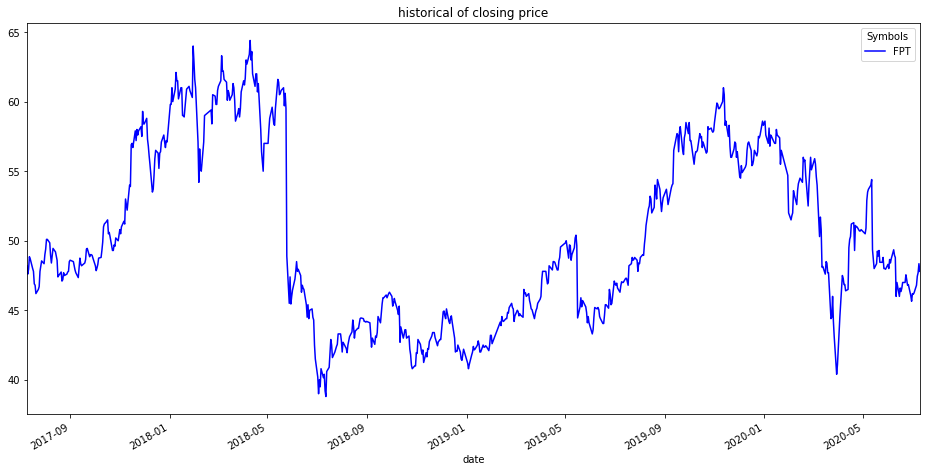

In [50]:
data['close'].plot(title = 'historical of closing price', figsize = (16,8), color = 'blue')

# Import nescessary libraries 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# calculate in each column to get completely insights from the data

In [53]:
High = data['high'].values
Low  = data['low'].values
Open = data['open'].values
Close = data['close'].values
Avg   = data['avg'].values
Volume = data['volume'].values
def count_mean_columns(mean_high,mean_low,mean_open,mean_close,mean_avg,mean_volume): 
    mean_high = sum(High)/len(High)
    mean_low = sum(Low)/len(Low)
    mean_open = sum(Open)/len(Open)
    mean_close = sum(Close)/len(Close)
    mean_avg = sum(Avg)/len(Avg)
    mean_volume = sum(Volume)/len(Volume)
    print("The average price of highest price is : ", mean_high)
    print("The average price of lowest  price is : ", mean_low)
    print("The average price of open price is : ", mean_open)
    print("The average price of close price is : ", mean_close)
    print("The average price of average price is : ", mean_avg)
    print("The average price of volume price is : ", mean_volume)
count_mean_columns(High,
                   Low,
                   Open,
                   Close,
                   Avg,
                   Volume)

The average price of highest price is :  [50.77163782]
The average price of lowest  price is :  [49.71198402]
The average price of open price is :  [50.21711052]
The average price of close price is :  [50.22256991]
The average price of average price is :  [50.23286285]
The average price of volume price is :  [1656960.85885486]


Why should I find out the largest price on each column. In order to make greater decision instead of giving out the irrational decisions. One should have good summary on the historical prices of each feature. 
Average price of features :
summary as we can see below
High : 50,7 
low  : 49,7 
Open : 50,21
Volume : 1659960, 85

based on the outline. I am going to draw down my trading strategy  base on volume and close. 

In [54]:
# find the max price and min price 
# find the biggest price in the close column
# Close columns 

data['Close'] = data['close'].values
def max_prices(highest_price) : 
    if len(Close) == 0 : 
        return 0; 
    curr_max = highest_price[0]
    for i in Close : 
        if i > curr_max : 
            curr_max = i
    #return curr_max
    print('the biggest price in the close column is : ', curr_max)
max_prices(Close)    


def min_price(lowest_price) : 
    if len(Close) == 0: 
        return 0; 
    curr_min = lowest_price[0]
    for i in Close : 
        if i < curr_min : 
            curr_min = i 
   # return curr_min 
    print('the lowest price in the close column is : ', curr_min)

min_price(Close) # try it out



the biggest price in the close column is :  [64.4]
the lowest price in the close column is :  [38.8]


I already develop functions to find to largest and smallest price of the close price in years 2017 t0 2020. The best price to make trading on scale between 38,8 to 64,4.  

Exploranatory features following volume and so on. 

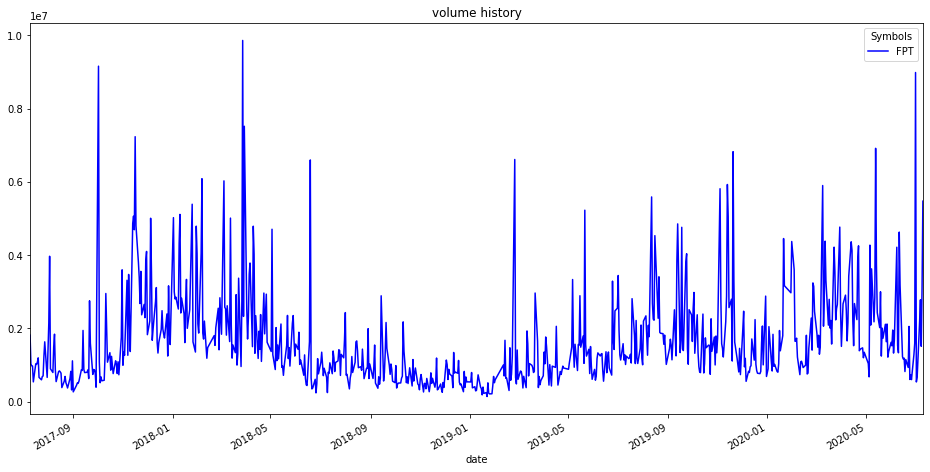

In [59]:
data['volume'].plot(title = 'volume history', figsize = (16,8), color = 'blue')

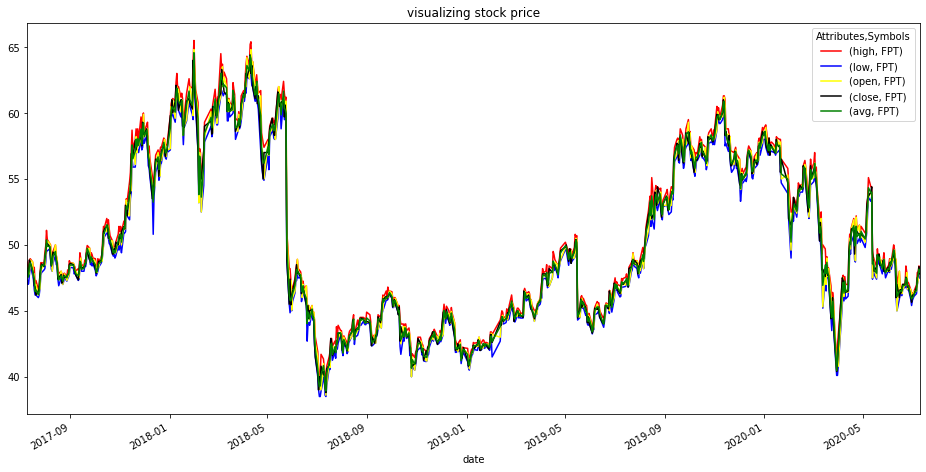

In [61]:
data[['high','low', 'open','close','avg']].plot(figsize = (16,8),title = "visualizing stock price",
                                                color = ('red','blue','yellow','black','green'))

Congratulation. I already provided to you an overview of the FPT stock price.

In the following steps. I am going to build simple regression model, this is the very tutorial machine learning before you dive into complicated machine learning algorithms. In this beginner algorithm, I will forecast the next days closing prices based on historial volume values.  

In [62]:
# define the explanatory price
X = data['volume']
print(X)

Symbols           FPT
date                 
2017-07-10  1816570.0
2017-07-11  1027560.0
2017-07-12   981630.0
2017-07-13   972830.0
2017-07-14   541080.0
...               ...
2020-07-06  2182958.0
2020-07-07  2779850.0
2020-07-08  1512596.0
2020-07-09  3098900.0
2020-07-10  5472060.0

[751 rows x 1 columns]


In [63]:
# define the target price 
y = data['close']
print(y)

Symbols       FPT
date             
2017-07-10  48.20
2017-07-11  47.60
2017-07-12  47.95
2017-07-13  48.85
2017-07-14  48.70
...           ...
2020-07-06  46.80
2020-07-07  47.45
2020-07-08  47.70
2020-07-09  48.35
2020-07-10  47.80

[751 rows x 1 columns]


In [64]:
# split data into the training set and test set 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4 , random_state = 1)

In [65]:
# featuring scale data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

In [66]:
print(X_train)

[[ 8.36671460e-01]
 [ 8.09843230e-01]
 [ 1.72697240e+00]
 [-4.58388204e-01]
 [-1.00193506e+00]
 [-5.41994466e-01]
 [-5.81073101e-01]
 [-5.71873502e-01]
 [ 4.03715460e-02]
 [-3.63026900e-01]
 [-2.05234135e-01]
 [-9.57825060e-02]
 [ 3.40231267e-01]
 [ 6.39273246e-01]
 [-1.80057115e-01]
 [-9.74611464e-01]
 [ 1.41135452e-01]
 [ 1.53851341e-01]
 [-4.67910181e-01]
 [-1.99596432e-01]
 [ 3.84475830e-01]
 [-6.99048118e-01]
 [-8.74524554e-01]
 [ 2.46918339e+00]
 [-1.79200058e-01]
 [-8.83849959e-01]
 [ 6.12077032e-01]
 [-8.05268093e-01]
 [-4.72981754e-01]
 [-6.46531779e-01]
 [ 1.82524994e-01]
 [-5.13593655e-01]
 [ 3.62860706e-01]
 [ 2.36016332e-01]
 [ 5.26455398e-02]
 [-3.82338193e-01]
 [-1.09259434e+00]
 [-6.41633190e-01]
 [-5.13735188e-01]
 [-1.31156140e-01]
 [-1.63875258e-01]
 [-3.78453918e-01]
 [-6.50070086e-01]
 [-7.73754468e-02]
 [-3.11784352e-01]
 [-8.36798339e-01]
 [ 6.03402676e-01]
 [ 1.94693715e+00]
 [ 8.87670258e-01]
 [ 7.28674468e-01]
 [-7.25318081e-01]
 [-1.03610724e+00]
 [ 1.5191951

In [67]:
print(X_test)

[[ 4.56971808e-01]
 [-5.28305149e-01]
 [-1.10910644e+00]
 [ 6.39052188e-02]
 [ 2.70383762e+00]
 [-1.13024193e+00]
 [ 5.17351051e-01]
 [ 1.32845210e+00]
 [ 2.39522291e-02]
 [-2.80891001e-01]
 [-5.05282565e-01]
 [ 8.28887185e-01]
 [-8.87301774e-01]
 [ 6.76040187e-01]
 [-5.70096486e-01]
 [ 1.37325335e+00]
 [ 2.89741199e-01]
 [-3.57302705e-01]
 [-4.21495456e-01]
 [-2.97198664e-01]
 [-8.59765883e-01]
 [ 5.92146153e+00]
 [ 3.68136715e-01]
 [-7.99677568e-01]
 [-5.53678742e-01]
 [-3.91860170e-01]
 [-5.84949512e-01]
 [ 1.23907042e-01]
 [-6.91641262e-01]
 [-8.99435132e-02]
 [-4.63852922e-01]
 [ 3.11622179e+00]
 [-8.77166490e-01]
 [ 5.14017179e-01]
 [ 5.74041805e-01]
 [ 2.53765356e+00]
 [ 6.64489580e-01]
 [-8.57013080e-01]
 [ 1.44230653e-03]
 [-9.21033634e-01]
 [ 1.74656675e+00]
 [ 2.36204346e+00]
 [-3.36175081e-01]
 [-1.32258519e-01]
 [-2.10722442e-01]
 [-2.25968614e-01]
 [ 5.87975658e-01]
 [ 3.90349419e-01]
 [ 4.96419999e-01]
 [ 1.30950721e+00]
 [-6.29854559e-01]
 [ 6.97042004e-01]
 [-2.6992696

Training the simple regression model on training set

In [68]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

predicting the test result 

In [69]:
y_pred = regressor.predict(X_train)

Visualzing the training results 

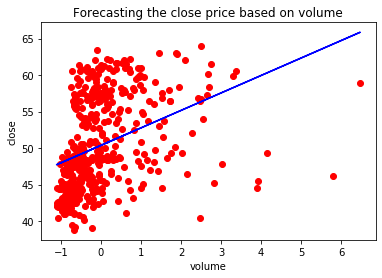

In [70]:
plt.scatter(X_train, y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Forecasting the close price based on volume')
plt.xlabel('volume')
plt.ylabel('close')
plt.show()

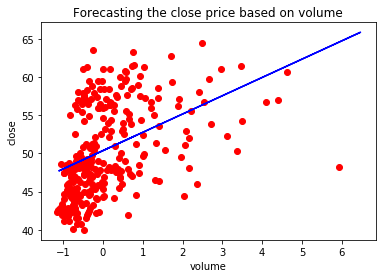

In [71]:
plt.scatter(X_test, y_test,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.title('Forecasting the close price based on volume')
plt.xlabel('volume')
plt.ylabel('close')
plt.show()